<a href="https://colab.research.google.com/github/qazalmehrban/Medical-Segmentation/blob/ghazal/scipy_signal_kaiserord.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

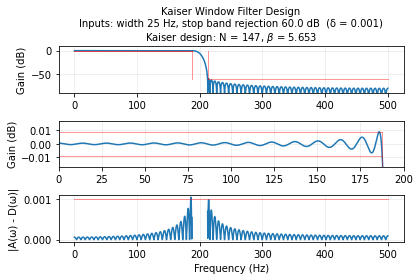

In [2]:
import numpy as np
from scipy.signal import kaiserord, firwin
import matplotlib.pyplot as plt


def kaiser_lowpass(stop_db, cutoff, width, fs=1):
    """
    Design a lowpass filter using the Kaiser window method.
    """
    stop_db = np.abs(stop_db)

    # Convert to normalized frequencies
    nyq = 0.5*fs
    cutoff = cutoff / nyq
    width = width / nyq

    # Design the parameters for the Kaiser window FIR filter.
    N, beta = kaiserord(stop_db, width)
    N |= 1  # Ensure a Type I FIR filter.

    taps = firwin(N, cutoff, window=('kaiser', beta), scale=False)

    return taps, beta


# User inputs...
# Values in Hz

sample_rate = 1000.0
cutoff = 200.0
width = 25.0
stop_db = 60.0

# Filter design...
taps, beta = kaiser_lowpass(stop_db, cutoff, width, sample_rate)

# Compute and plot the frequency response...
n = 16384
h = np.fft.rfft(taps, n)
w = np.fft.rfftfreq(n, 1/sample_rate)

delta = 10**(-stop_db/20)

plt.subplot(3, 1, 1)
plt.plot(w, 20*np.log10(np.abs(h)))
upper_ripple = 20*np.log10(1 + delta)
lower_ripple = 20*np.log10(1 - delta)
lower_trans = cutoff - 0.5*width
upper_trans = cutoff + 0.5*width
plt.plot([0, lower_trans], [upper_ripple, upper_ripple], 'r',
         linewidth=1, alpha=0.4)
plt.plot([0, lower_trans], [lower_ripple, lower_ripple], 'r',
         linewidth=1, alpha=0.4)
plt.plot([upper_trans, 0.5*sample_rate], [-stop_db, -stop_db], 'r',
         linewidth=1, alpha=0.4)
plt.plot([lower_trans, lower_trans], [-stop_db, upper_ripple], color='r',
         linewidth=1, alpha=0.4)
plt.plot([upper_trans, upper_trans], [-stop_db, upper_ripple], color='r',
         linewidth=1, alpha=0.4)

plt.ylim(-1.5*stop_db, 10)
plt.ylabel('Gain (dB)')
plt.title(('Kaiser Window Filter Design\n'
           'Inputs: width %g Hz, stop band rejection %.1f dB  '
           '(δ = %g)\n'
           'Kaiser design: N = %d, $\\beta$ = %.3f') %
          (width, stop_db, delta, len(taps), beta),
          fontsize=10)
plt.grid(alpha=0.25)

plt.subplot(3, 1, 2)
plt.plot(w, 20*np.log10(np.abs(h)))
upper_ripple = 20*np.log10(1 + delta)
lower_ripple = 20*np.log10(1 - delta)
plt.plot([0, lower_trans], [upper_ripple, upper_ripple], 'r',
         linewidth=1, alpha=0.4)
plt.plot([0, lower_trans], [lower_ripple, lower_ripple], 'r',
         linewidth=1, alpha=0.4)
plt.plot([upper_trans, 1], [-stop_db, -stop_db], 'r', linewidth=1, alpha=0.4)
plt.plot([lower_trans, lower_trans], [-stop_db, upper_ripple], color='r',
         linewidth=1, alpha=0.4)
plt.plot([upper_trans, upper_trans], [-stop_db, upper_ripple], color='r',
         linewidth=1, alpha=0.4)

plt.ylim(2*lower_ripple, 2*upper_ripple)
plt.ylabel('Gain (dB)')
plt.xlim(0, cutoff)
plt.grid(alpha=0.25)

plt.subplot(3, 1, 3)
desired = w < cutoff
deviation = np.abs(np.abs(h) - desired)
deviation[(w >= cutoff-0.5*width) & (w <= cutoff + 0.5*width)] = np.nan
plt.plot(w, deviation)
plt.plot([0, 0.5*sample_rate], [delta, delta], 'r', linewidth=1, alpha=0.4)
plt.ylabel('|A(ω) - D(ω)|')
plt.grid(alpha=0.25)

plt.xlabel('Frequency (Hz)')
plt.tight_layout()
plt.show()